# Ride Analysis

#### Dependencies and Data

In [1]:
# import dependencies

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import and read csv files
ride_data_path = "resources/ride_data.csv"
city_data_path = "resources/city_data.csv"

ride_data_df = pd.read_csv(ride_data_path)
city_data_df = pd.read_csv(city_data_path)

In [3]:
# merge dataframes
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


### City analysis

In [4]:
# Create Urban Suburban and Rural City DataFrames.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]


#### Fare by city and city type

In [5]:
# The total number of rides for each city type.
urban_ride_total = urban_cities_df.groupby(["city"]).count()["ride_id"].sort_values(ascending=False)
suburban_ride_total = suburban_cities_df.groupby(["city"]).count()["ride_id"].sort_values(ascending=False)
rural_ride_total = rural_cities_df.groupby(["city"]).count()["ride_id"].sort_values(ascending=False)

In [6]:
# The average fare for each city type.
urban_fare_mean = urban_cities_df.groupby(["city"]).mean()["fare"].sort_values(ascending=False)
suburban_fare_mean = suburban_cities_df.groupby(["city"]).mean()["fare"].sort_values(ascending=False)
rural_fare_mean = rural_cities_df.groupby(["city"]).mean()["fare"].sort_values(ascending=False)


In [7]:
# the average number of drivers for each city type.
urban_driver_mean = urban_cities_df.groupby(["city"]).mean()["driver_count"].sort_values(ascending=False)
suburban_driver_mean = suburban_cities_df.groupby(["city"]).mean()["driver_count"].sort_values(ascending=False)
rural_driver_mean = rural_cities_df.groupby(["city"]).mean()["driver_count"].sort_values(ascending=False)


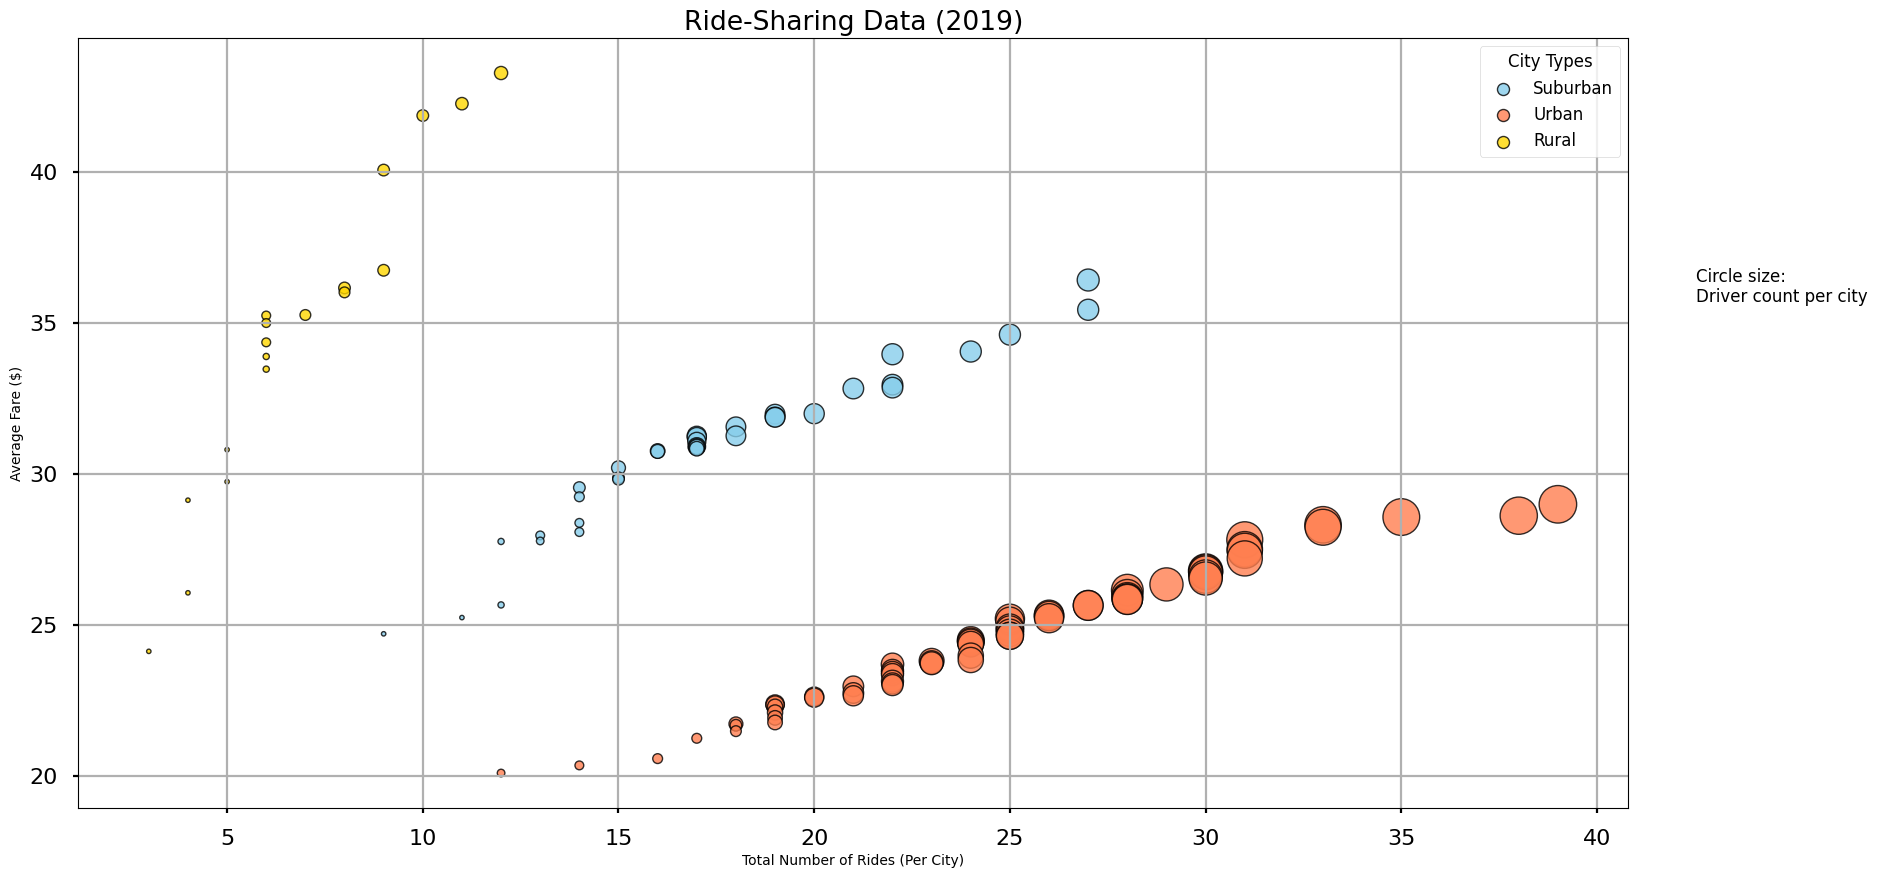

In [8]:
# Create a bubble chart that showcases the average fare versus the total number of rides
# with bubble size based on the total number of drivers for each city type, including urban, suburban, and rural.
# build the suburban scatter plot

#style the plot
plt.style.use('seaborn-poster')

# Build the scatter plots for each city types.
fig, ax = plt.subplots(figsize=(20, 10))
# Build the Suburban scatter plot.
ax.scatter(suburban_ride_total,suburban_fare_mean, s=suburban_driver_mean*10, c="skyblue", edgecolor="black", linewidths=1, alpha=0.8, label="Suburban")
# Build the Urban scatter plot.
ax.scatter(urban_ride_total, urban_fare_mean, s=urban_driver_mean*10, c="coral", edgecolor="black", linewidths=1, alpha=0.8, label="Urban")
# Build the Rural scatter plot.
ax.scatter(rural_ride_total, rural_fare_mean, s=rural_driver_mean*10, c="gold", edgecolor="black", linewidths=1, alpha=0.8, label="Rural")

# Incorporate the other graph properties
ax.set_title("Ride-Sharing Data (2019)")
ax.set_xlabel("Total Number of Rides (Per City)")
ax.set_ylabel("Average Fare ($)")
ax.grid(True)

# Create a legend
lgnd = ax.legend(fontsize="12", mode="Expanded", scatterpoints=1, loc="best", title="City Types")
# Adjust the legend
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size under the legend.
chart_text = '''
    Circle size:
    Driver count per city
'''
ax.text(42, 35, chart_text, fontsize="12", wrap=False)

# Adjust the layout to include space for the text
plt.subplots_adjust(right=.9)

# Save the figure.
# plt.savefig("analysis/ride_by_avg_fare.png")

#### Ride Count Data

In [9]:
display(urban_cities_df.describe(),suburban_cities_df.describe(),rural_cities_df.describe())

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [10]:
# Calclulate the measures of central tendency for the ride count for each city type.

# Urban central tendency
mean_urban_ride = np.mean(urban_ride_total)
median_urban_ride = np.median(urban_ride_total)
mode_urban_ride = sts.mode(urban_ride_total)

# Suburban central tendency
mean_suburban_ride = np.mean(suburban_ride_total)
median_suburban_ride = np.median(suburban_ride_total)
mode_suburban_ride = sts.mode(suburban_ride_total)

# Rural central tendency
mean_rural_ride = np.mean(rural_ride_total)
median_rural_ride = np.median(rural_ride_total)
mode_rural_ride = sts.mode(rural_ride_total)


In [11]:
# Calclulate the measures of central tendency for the average fare for each city type.

# Get fare data for each city type
urban_fare = urban_cities_df["fare"]
suburban_fare = suburban_cities_df["fare"]
rural_fare = rural_cities_df["fare"]

# Urban central tendency
mean_urban_fare = np.mean(urban_fare)
median_urban_fare = np.median(urban_fare)
mode_urban_fare = sts.mode(urban_fare)

# Suburban central tendency
mean_suburban_fare = np.mean(suburban_fare)
median_suburban_fare = np.median(suburban_fare)
mode_suburban_fare = sts.mode(suburban_fare)

# Rural central tendency
mean_rural_fare = np.mean(rural_fare)
median_rural_fare = np.median(rural_fare)
mode_rural_fare = sts.mode(rural_fare)



In [12]:
# Calclulate the measures of central tendency for the driver count for each city type.

# Get driver count data for each city type
urban_driver = urban_cities_df["driver_count"]
suburban_driver = suburban_cities_df["driver_count"]
rural_driver = rural_cities_df["driver_count"]

# Urban central tendency
mean_urban_driver = np.mean(urban_driver)
median_urban_driver = np.median(urban_driver)
mode_urban_driver = sts.mode(urban_driver)

# Suburban central tendency
mean_suburban_driver = np.mean(suburban_driver)
median_suburban_driver = np.median(suburban_driver)
mode_suburban_driver = sts.mode(suburban_driver)

# Rural central tendency
mean_rural_driver = np.mean(rural_driver)
median_rural_driver = np.median(rural_driver)
mode_rural_driver = sts.mode(rural_driver)

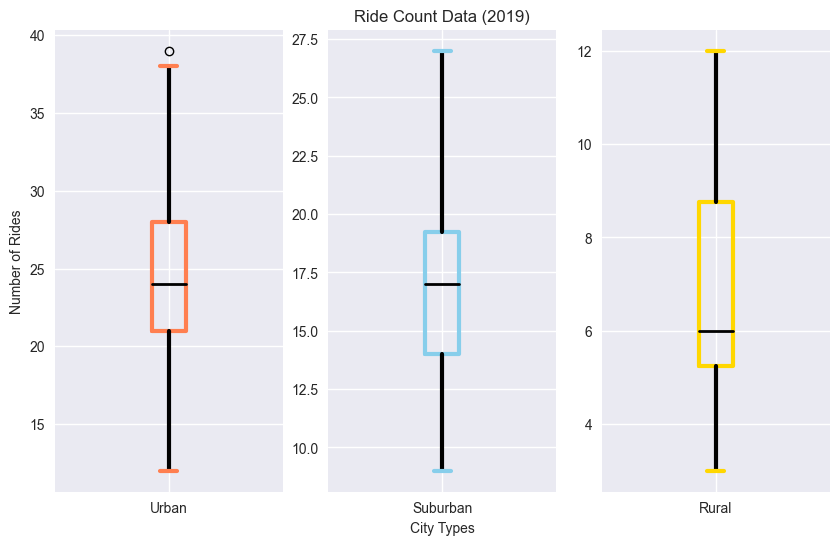

In [13]:
# Create a box-and-whisker plot

# create and style the plot
plt.style.use('seaborn')
fig, axes = plt.subplots(1,3,figsize=(10, 6))

# gather/prep the data
ride_count_totals = [urban_ride_total, suburban_ride_total, rural_ride_total]
x_labels = ["Urban", "Suburban", "Rural"]
colors = ["coral", "skyblue", "gold"]

# Build the boxplot for the urban cities ride count. = 
for i, ax in enumerate(axes):
    ax.boxplot(ride_count_totals[i], labels=[x_labels[i]], boxprops=dict(linewidth=3, color=colors[i]), medianprops=dict(linewidth=2, color="black"), whiskerprops=dict(linewidth=3, color="black"), capprops=dict(linewidth=3, color=colors[i]))



# Add the title, y-axis label and grid.
axes[1].set_title('Ride Count Data (2019)')
axes[0].set_ylabel('Number of Rides')
axes[1].set_xlabel('City Types')
# Save the figure.
# plt.savefig("analysis/ride_count_boxplot.png")
plt.show()

#### Fare percentages

In [14]:
# Gather and calculate the fare data

# get the sum of the fares for each city type
city_type_fares = pyber_data_df.groupby(["type"]).sum()["fare"].sort_values(ascending=False)
# get a sum of all the fares
total_fares = pyber_data_df["fare"].sum()
# calculate the percentage of the total fares for each city type
fare_percentages = 100 * city_type_fares / total_fares



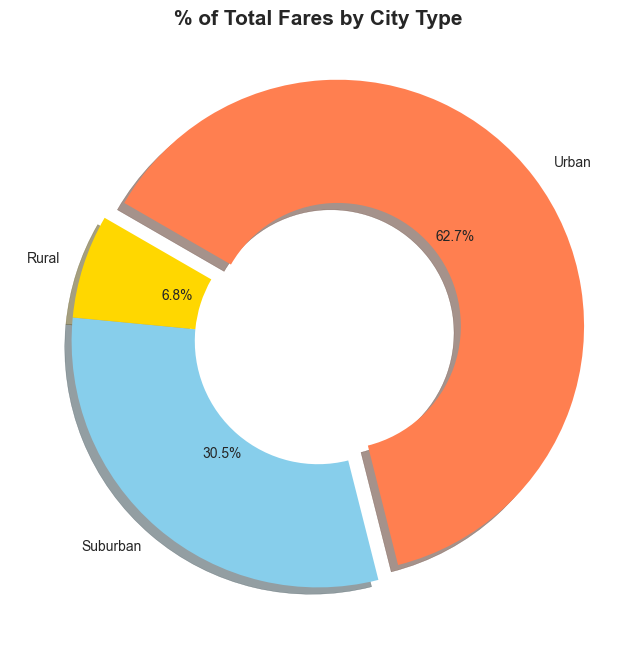

In [15]:
# Build the percentage of fares by city type pie chart.
fig, ax = plt.subplots(figsize=(10, 8))

ax.pie(
    fare_percentages, 
    labels=x_labels, 
    colors=colors, 
    explode=[0.1, 0, 0], 
    autopct='%1.1f%%', 
    shadow=True, 
    startangle=150, 
    counterclock=False,
    wedgeprops=dict(width=0.5)
)

# set the title
ax.set_title("% of Total Fares by City Type", fontsize=15,fontweight="bold")

mpl.rcParams['font.size'] = 14


# Save the figure.
# plt.savefig("analysis/fares_by_city_type.png")


#### Ride Percentages

In [16]:
# Gather and calculate the ride data

# get the sum of the rides for each city type
city_type_rides = pyber_data_df.groupby(["type"]).count()["ride_id"].sort_values(ascending=False)
# get a sum of all the rides
total_rides = pyber_data_df["ride_id"].count()
# calculate the percentage of the total rides for each city type
ride_percentages = 100 * city_type_rides / total_rides


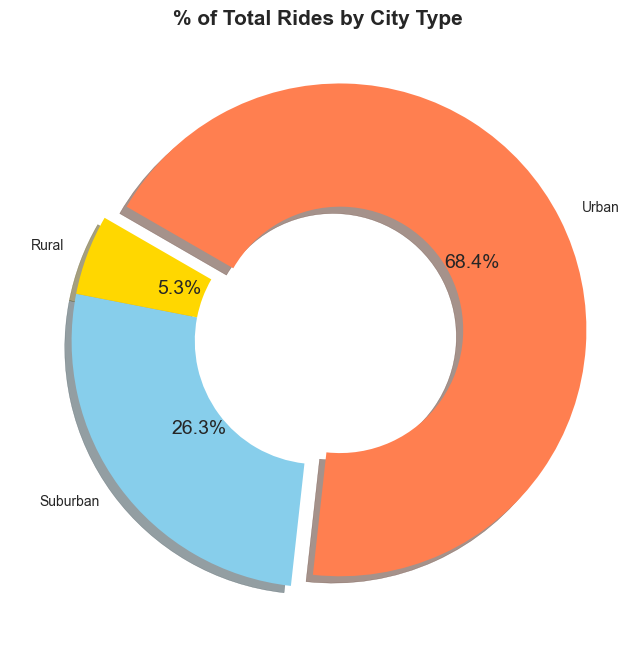

In [17]:
# Build the percentage of rides by city type pie chart.
fig, ax = plt.subplots(figsize=(10, 8))

ax.pie(
    ride_percentages, 
    labels=x_labels, 
    colors=colors, 
    explode=[0.1, 0, 0], 
    autopct='%1.1f%%', 
    shadow=True, 
    startangle=150, 
    counterclock=False,
    wedgeprops=dict(width=0.5)
)

# set the title
ax.set_title("% of Total Rides by City Type", fontsize=15,fontweight="bold")

mpl.rcParams['font.size'] = 14


# Save the figure.
# plt.savefig("analysis/rides_by_city_type.png")


#### Driver Percentages

In [18]:
# Gather and calculate the driver data

# get the sum of the drivers for each city type
city_type_driver = city_data_df.groupby(["type"]).sum()["driver_count"].sort_values(ascending=False)
# get a sum of all the drivers
total_drivers = city_data_df["driver_count"].sum()
# calculate the percentage of the total drivers for each city type
driver_percentages = 100 * city_type_driver / total_drivers

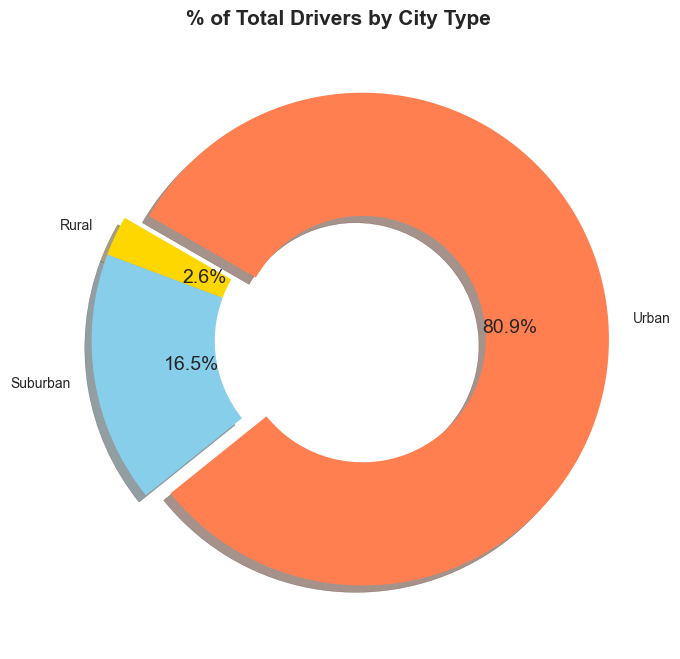

In [20]:
# Build the percentage of drivers by city type pie chart.
fig, ax = plt.subplots(figsize=(10, 8))

ax.pie(
    driver_percentages,
    labels=x_labels, 
    colors=colors, 
    explode=[0.1, 0, 0], 
    autopct='%1.1f%%', 
    shadow=True, 
    startangle=150, 
    counterclock=False,
    wedgeprops=dict(width=0.5)
)

# set the title
ax.set_title("% of Total Drivers by City Type", fontsize=15,fontweight="bold")

mpl.rcParams['font.size'] = 14


# Save the figure.
# plt.savefig("analysis/drivers_by_city_type.png")